### Random Forest Classifier 
##### 28 Features, 18 features, 7 features

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time
print("Random Forest Model trained 28 features")

train_file_path = '../Dataset/train_28f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_28f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)
#resetting index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

features_to_drop = ['Class']

#target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate mean metrics over all folds
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

# Print mean metrics
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


Random Forest Model trained 28 features
Mean Accuracy: 99.83%
Mean Precision: 99.84%
Mean Recall: 99.83%
Mean F1 Score: 99.83%
Training Time: 12.03 seconds

Test Metrics:
Accuracy: 99.92%
Precision: 99.92%
Recall: 99.92%
F1 Score: 99.92%


 18 features
Mean Accuracy: 99.89%
Mean Precision: 99.89%
Mean Recall: 99.89%
Mean F1 Score: 99.89%
Training Time: 10.83 seconds

Test Metrics:
Accuracy: 99.92%
Precision: 99.92%
Recall: 99.92%
F1 Score: 99.92%


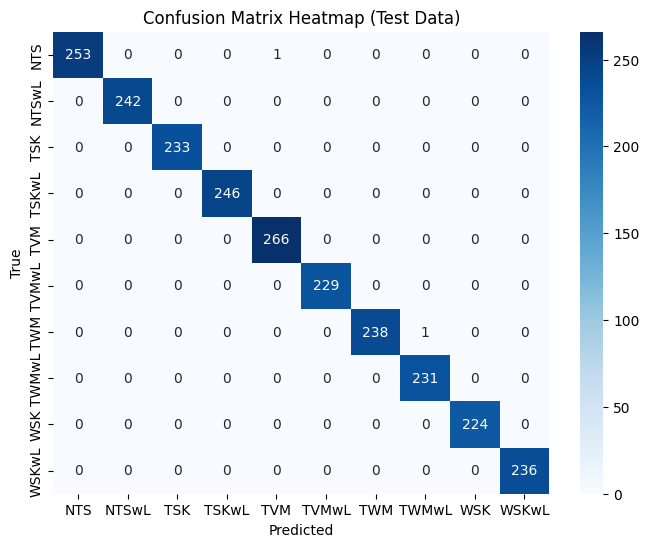

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print(" 18 features")

train_file_path = '../Dataset/train_18f.csv'  
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_18f.csv' 
test_data = pd.read_csv(test_file_path)
#resetting index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']

#target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate mean metrics over all folds
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

# Print mean metrics
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib 

print(" Random forest 7 feautres")

train_file_path = '../Dataset/train_18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

# Reset index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 7 features
features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

#target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

# 'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)

# Print test metrics
print("\nTest Metrics:")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

joblib.dump(random_forest_model, '../Models/rf_model.pkl') 
joblib.dump(label_encoder, '../Models/label_encoder_rf.pkl') 

 Random forest 7 feautres
Training Time: 9.84 seconds

Test Metrics:
Test Accuracy: 99.83%


['../Models/label_encoder_rf.pkl']